In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Probability of automation in different occupations per state

Here we are reading in our dataset of automation of different occupations per state and we then sort by probability in order to figure out which occupation is the most likely to be automated and which occupation is least likely to be automated.

In [3]:
#read and create automation data by state data frame
automation_data_df = pd.read_csv('../Resources/automation_data_by_state.csv', encoding='cp1252')

#clean the dataframe by removing all rows where there are no data in any of the state (0 for every state)
automation_data_df = automation_data_df.drop(automation_data_df[automation_data_df.iloc[:,3:].sum(axis=1) == 0].index)

#sorted dataframe by least likely to be automated jobs
automation_data_df_least_likely = automation_data_df.sort_values(by=['Probability'])
automation_data_df_least_likely

#sort by highest probability of automation to lowest
automation_data_df_sorted = automation_data_df.sort_values(by=['Probability'], ascending=False)

automation_data_df_sorted

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
54,13-2053,Insurance Underwriters,0.9900,960,120,1470,200,7440,1390,3160,...,270,880,5660,460,190,2280,1970,170,2290,90
190,25-4031,Library Technicians,0.9900,830,260,1430,400,10190,2460,1650,...,650,1340,3740,560,550,2290,2870,320,2520,440
75,15-2091,Mathematical Technicians,0.9900,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,0,0,0
403,43-4141,New Accounts Clerks,0.9900,430,50,900,450,3850,480,90,...,40,950,4280,350,0,980,630,320,1160,170
601,51-6051,Sewers; Hand,0.9900,110,0,0,0,1820,0,0,...,0,0,880,0,0,50,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,29-1181,Audiologists,0.0033,70,0,290,60,880,290,90,...,0,320,970,150,0,360,420,110,160,0
159,21-1023,Mental Health and Substance Abuse Social Workers,0.0031,1150,460,2510,830,12850,1770,2030,...,290,1630,3310,1130,980,4210,2300,190,1520,130
501,49-1011,First-Line Supervisors of Mechanics; Installer...,0.0030,8150,1140,10410,4890,39910,7340,4180,...,930,10630,38300,4330,1170,13860,10490,3220,8380,1740
29,11-9161,Emergency Management Directors,0.0030,180,70,140,130,900,130,130,...,90,140,480,130,0,440,150,70,170,40


##  State information datasets
Here we are trying to figure out the number of workers per state and to do this we combine two different datasets <br>
1. A dataset with the employment percentages per state<br>
2. A dataset with the population per state<br>
<br>
thus we are able to compute the number of workers in each state

In [4]:
#create the state population data frame
state_population_df = pd.read_csv('../Resources/state_pops.csv')

#clean state dataframe by getting just data from 2017 and sorting alphabetically by state name
state_population_df = pd.DataFrame(state_population_df.iloc[117] * 10**6).drop('Year')
state_population_df = state_population_df.sort_index()
state_population_df = pd.DataFrame(state_population_df.iloc[:,0].values, columns=['Total Pop'])

#create the state employment data frame
state_employment_df = pd.read_csv('../Resources/State Employment Rates.csv')
state_employment_df

#join both the total population and employment percentages per state in order to find the number of workers per state
state_info_df = state_employment_df.join(state_population_df)
state_info_df['Workers'] = round(state_info_df['Total Pop'] * (state_info_df['Employment Percentage'] / 100))
state_info_df

,State,Employment Percentage,Total Pop,Workers
0,Alabama,54.9,4874747.0,2676236.0
1,Alaska,60.9,739795.0,450535.0
2,Arizona,58.4,7016270.0,4097502.0
3,Arkansas,55.7,3004279.0,1673383.0
4,California,59.8,39536653.0,23642918.0
5,Colorado,66.9,5607154.0,3751186.0
6,Connecticut,63.4,3588184.0,2274909.0
7,Delaware,60.2,693972.0,417771.0
8,District of Columbia,66.5,961939.0,639689.0
9,Florida,57.3,20984400.0,12024061.0


## Displays a histogram of the probability for the data

The histogram below displays the number of jobs that would be automated within different percentile ranges. By looking at the chart, most of the jobs in the dataset have a 0-0.05% chance of being automated.

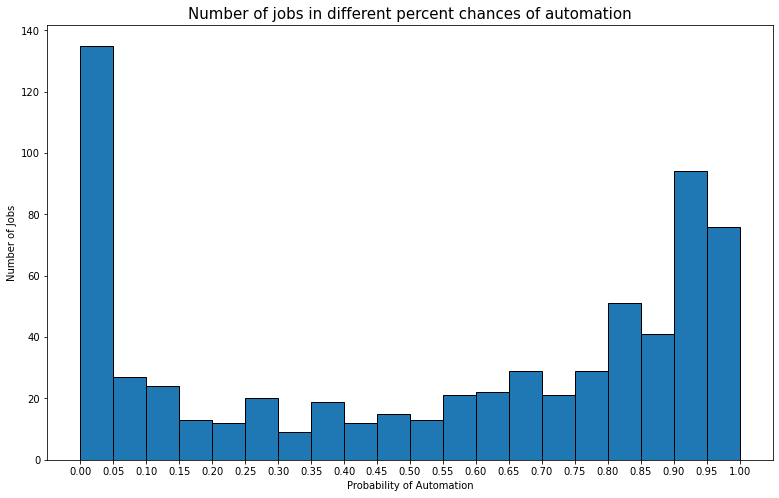

In [5]:
#plots the distribution of the data based on probability (0-0.05, 0.05-0.10, .. etc)
bins = np.arange(0,1.05,0.05)
#x_labes = 
prob_data = automation_data_df_sorted['Probability'].values
plt.figure(figsize=(13, 8))
plt.hist(prob_data,bins,edgecolor='black')
plt.xticks(bins)
plt.title('Number of jobs in different percent chances of automation', fontsize = 15)
plt.ylabel('Number of Jobs', fontsize=10)
plt.xlabel('Probability of Automation', fontsize=10)

plt.savefig('../Graphs/jobs_diff_percent.png')

plt.show()

## Number of jobs lost due to automation per state

<br>

<b style="color:blue">The chart below shows the total number of jobs that could be lost per state due to automation.</b>
<br>
<br>
Below we see California in first with around 14 million total job losses due to automation. This however may be explained due to the difference in population. <br>


In [6]:
#gets the sum of the number of jobs that will be automated per state
jobs_df = automation_data_df_sorted.iloc[:,3:]
jobs_loss_per_state = jobs_df.sum()

#set up variables for chart of job losses per state
sorted_jobs_loss_per_state = jobs_loss_per_state.sort_values()
sorted_jobs_loss_per_state

Wyoming                   247700
Vermont                   264580
Alaska                    284920
Delaware                  371070
South Dakota              378530
North Dakota              380000
Montana                   401890
Rhode Island              404020
Maine                     527810
Hawaii                    558070
New Hampshire             573810
Idaho                     589520
District of Columbia      599560
West Virginia             614590
New Mexico                716270
Nebraska                  863660
Mississippi              1003550
Arkansas                 1070380
Nevada                   1140240
Kansas                   1216310
Utah                     1237590
Iowa                     1363960
Oklahoma                 1441120
Connecticut              1475400
Oregon                   1540720
Kentucky                 1650310
Alabama                  1722020
Louisiana                1722150
South Carolina           1801950
Colorado                 2212180
Maryland  

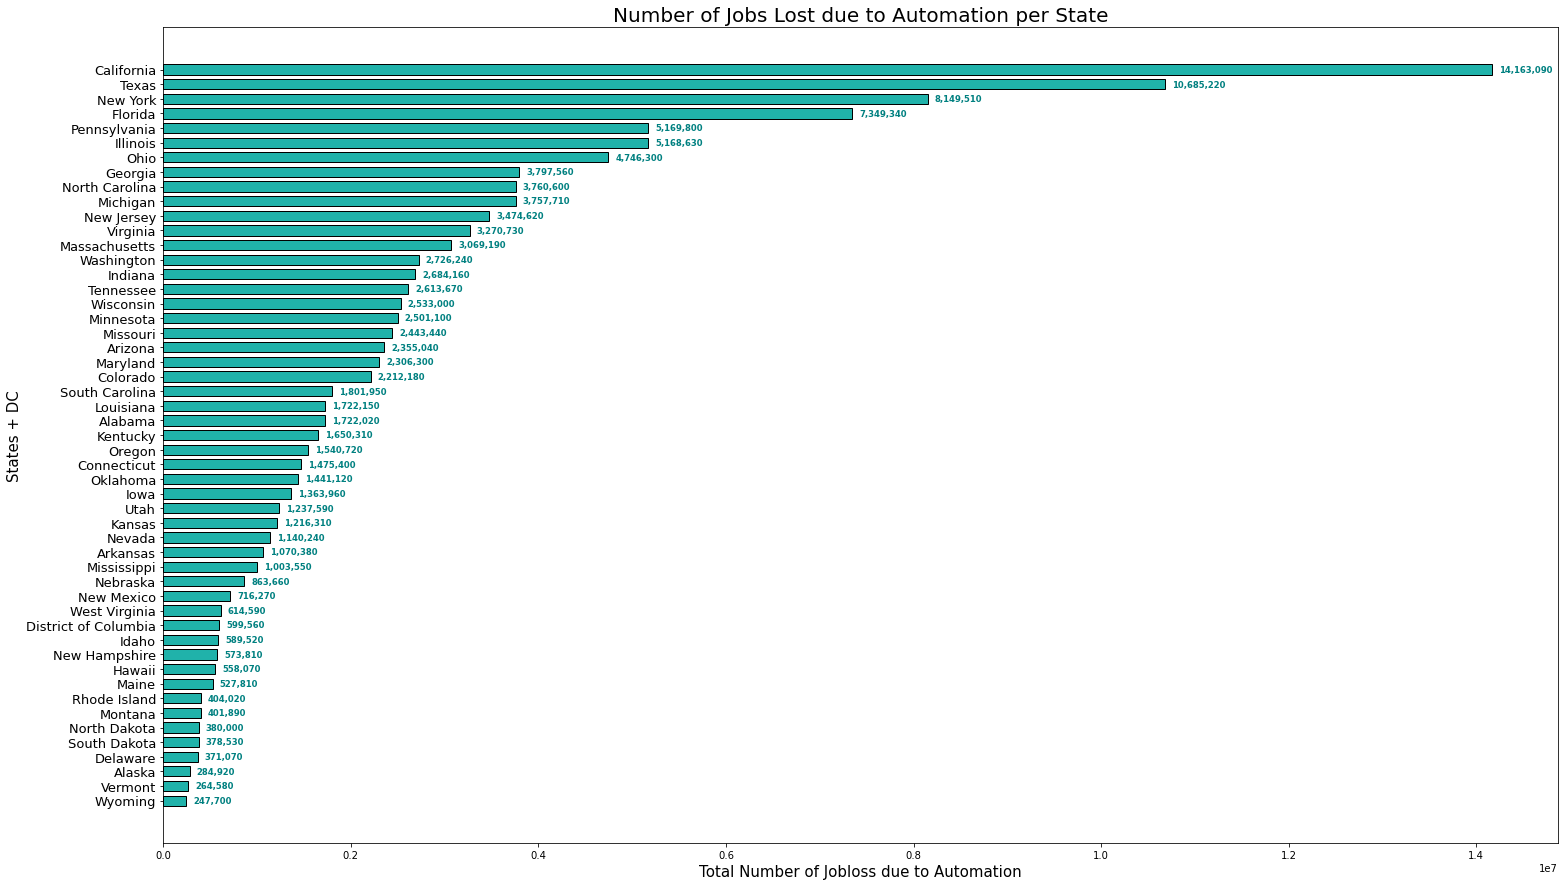

In [7]:
#Plot of the number of jobs lost due to automation per state
jobs_loss_per_state_values = sorted_jobs_loss_per_state.values
jobs_loss_per_state_indx = np.arange(len(jobs_loss_per_state_values))
jobs_loss_per_state_labels = sorted_jobs_loss_per_state.index

#plot the figure
plt.figure(figsize=(25, 15))
plt.title('Number of Jobs Lost due to Automation per State', fontsize = 20)
plt.barh(jobs_loss_per_state_indx, jobs_loss_per_state_values, color='lightseagreen', edgecolor = 'black',height = 0.7, align='center')
plt.yticks(jobs_loss_per_state_indx, jobs_loss_per_state_labels, fontsize=13)
plt.ylabel('States + DC', fontsize=15)
plt.xlabel('Total Number of Jobloss due to Automation', fontsize=15)
for i,j in zip(jobs_loss_per_state_indx, jobs_loss_per_state_values):
    num = format(j,',')
    plt.text(j+75000, i, f'{num}',va='center', weight='bold', color='teal', fontsize = 8.5)

plt.savefig('../Graphs/job_loss_per_state.png')

plt.show()


## Percentage of jobs automated per state

Here we show how although California has the highest total amount of job loss, the District of Columbia actually has the largest percentage of jobs that would be automated.

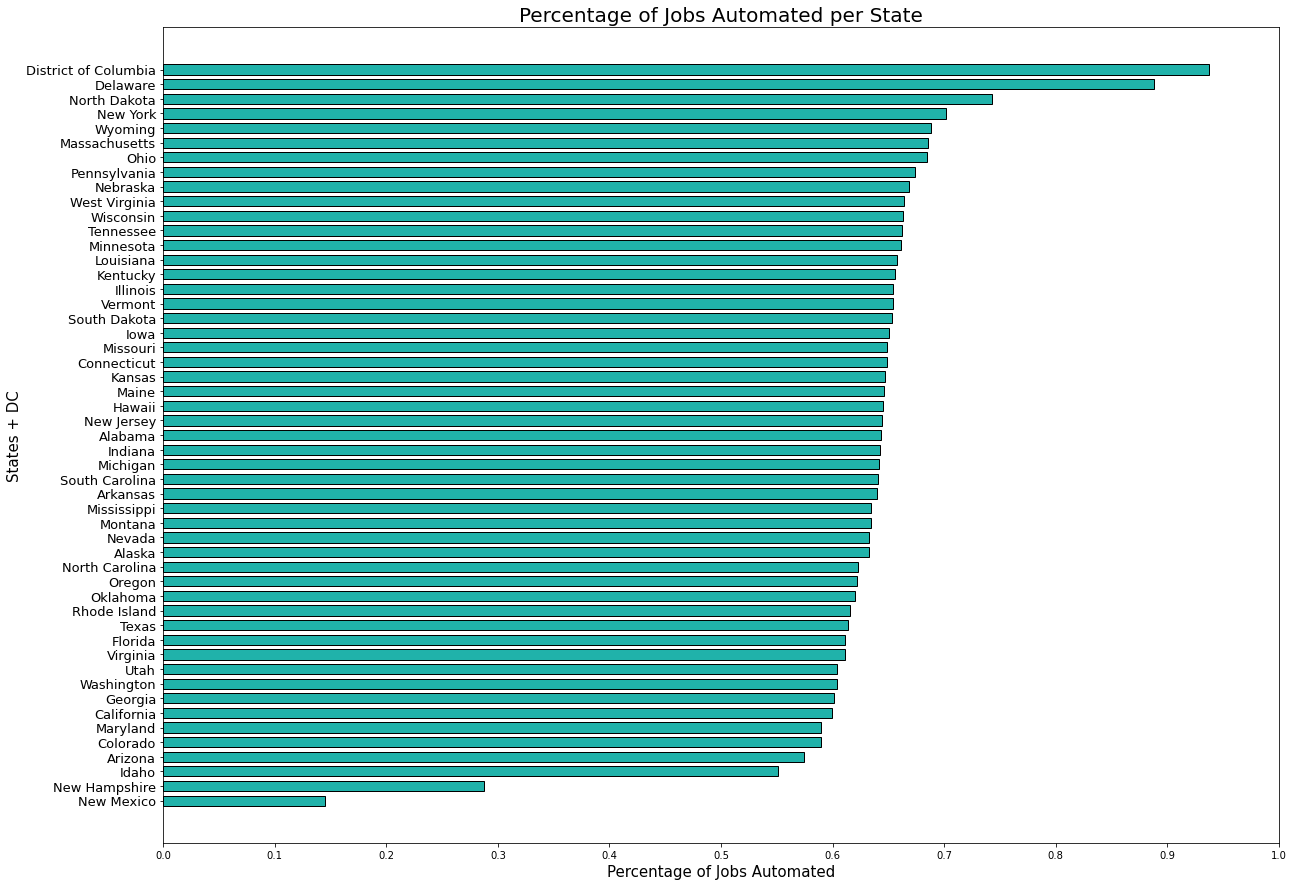

In [8]:
#dataframe to calculate the percentage of automated jobs
state_info = jobs_loss_per_state / state_info_df['Workers'].values
state_info = state_info.sort_values()
state_indx = np.arange(len(state_info))

#plot the figure
plt.figure(figsize=(20, 15))
plt.title('Percentage of Jobs Automated per State', fontsize = 20)
plt.barh(state_indx, state_info.values, color='lightseagreen', edgecolor = 'black',height = 0.7, align='center')
plt.yticks(state_indx, state_info.index, fontsize=13)
plt.ylabel('States + DC', fontsize=15)
plt.xlabel('Percentage of Jobs Automated', fontsize=15)
plt.xticks(np.arange(0,1.1,0.1))

plt.savefig('../Graphs/percentage_job_automation.png')

plt.show()




## Displays top 3 states by amount of jobs impacted and breakdown of the top 20 jobs that would be automated
<br>
<br>
From the graph below we can see that within the top 3 states that will be effected by automation, the most notable from the top 15 jobs likely to be automated (98-99%) is Bookkeeping;Accounting;Auditing Clerks and California specifically holds over 175,000 of those jobs. 

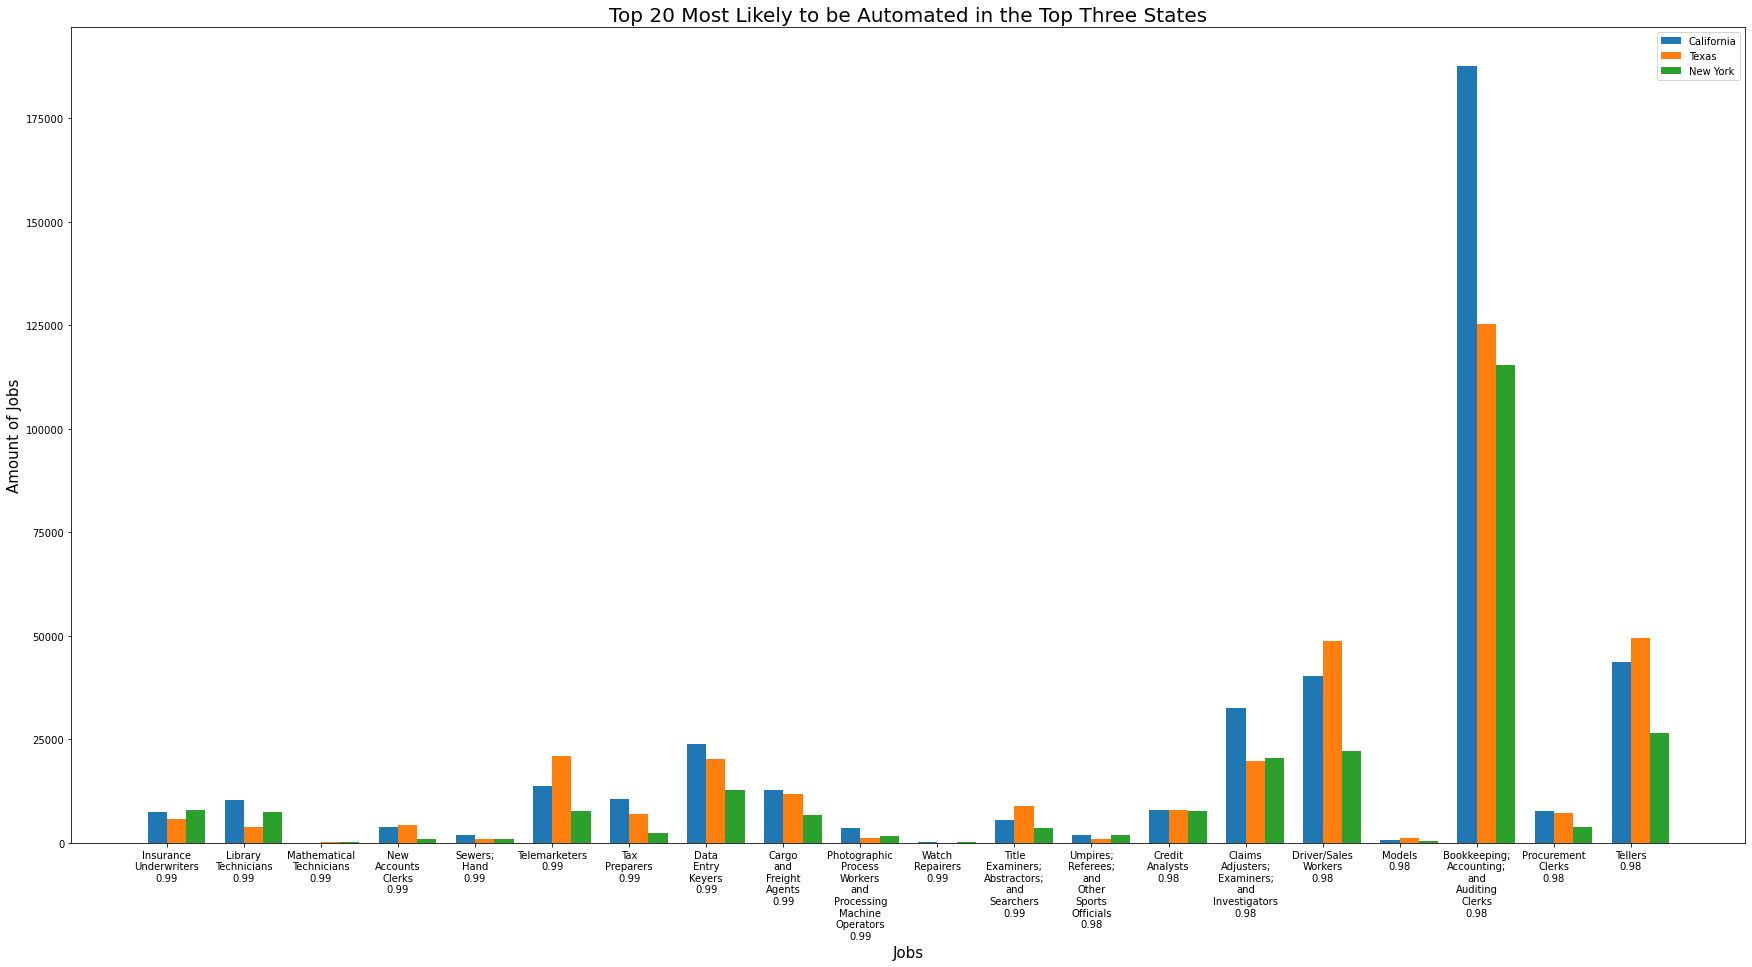

In [13]:
#top x jobs with highest automation chance
idx_range = 20

#Dataframe of california, texas, and new york sorted by jobs most likely to be automated
california_df = automation_data_df_sorted['California'].values[:idx_range]
texas_df = automation_data_df_sorted['Texas'].values[:idx_range]
new_york_df = automation_data_df_sorted['New York'].values[:idx_range]

#replace the space character with new line in order to wrap the words to display the text cleanly
x_labels = [i.replace(' ', '\n') for i in automation_data_df_sorted['Occupation'].values[:idx_range]]
percentages = [('\n' + str(i)) for i in automation_data_df_sorted['Probability'].values[:idx_range]]

x_labels = [i + j for i,j in zip(x_labels, percentages)]


x = np.arange(len(x_labels))

#plot variables
width = 0.25
plt.figure(figsize=(30, 15))
plt.bar(x, california_df, width = 0.25, label = 'California')
plt.bar(x + width, texas_df, width = 0.25, label = 'Texas')
plt.bar(x + (2 * width), new_york_df, width = 0.25, label = 'New York')

plt.xticks(x + width/2, x_labels)
plt.legend()
plt.ylabel('Amount of Jobs', fontsize=15)
plt.xlabel('Jobs', fontsize=15)
plt.title('Top 20 Most Likely to be Automated in the Top Three States', fontsize = 20)

plt.savefig('../Graphs/top_three_highest_automation.png')

plt.show()


## Top 20 least likely to be automated jobs in the top 3 states with the most automation by number of jobs affected

Below the plot shows that Elementary school teacher is a occupation that has a very low chance of automation as well as a occupation that many people hold.

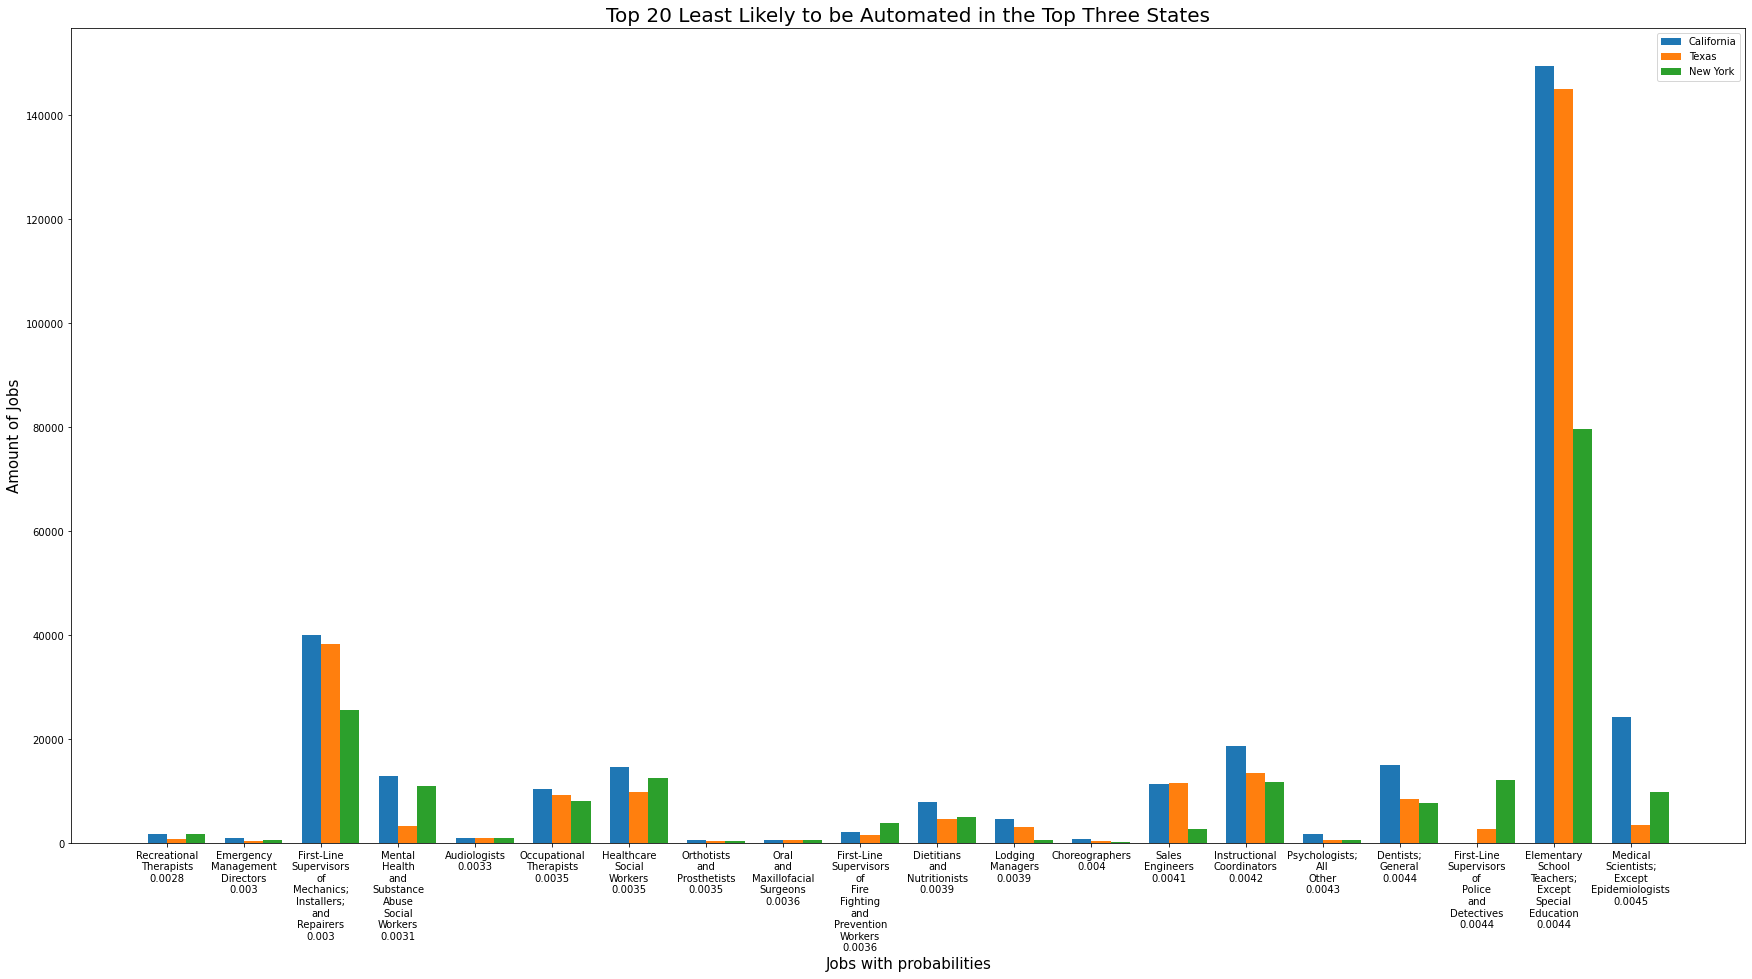

In [10]:
#top x jobs with highest automation chance
idx_range = 20

#Number of jobs with 99% chance of automation in California
california_df = automation_data_df_least_likely['California'].values[:idx_range]
texas_df = automation_data_df_least_likely['Texas'].values[:idx_range]
new_york_df = automation_data_df_least_likely['New York'].values[:idx_range]

#replace the space character with new line in order to wrap the words to display the text cleanly
x_labels = [i.replace(' ', '\n') for i in automation_data_df_least_likely['Occupation'].values[:idx_range]]
percentages = [('\n' + str(i)) for i in automation_data_df_least_likely['Probability'].values[:idx_range]]

x_labels = [i + j for i,j in zip(x_labels, percentages)]

x = np.arange(len(x_labels))

#plot variables

plt.figure(figsize=(30, 15))
plt.bar(x, california_df, width = 0.25, label = 'California')
plt.bar(x + width, texas_df, width = 0.25, label = 'Texas')
plt.bar(x + (2 * width), new_york_df, width = 0.25, label = 'New York')

plt.xticks(x + width/2, x_labels)
plt.legend()
plt.ylabel('Amount of Jobs', fontsize=15)
plt.xlabel('Jobs with probabilities', fontsize=15)
plt.title('Top 20 Least Likely to be Automated in the Top Three States', fontsize = 20)

plt.savefig('../Graphs/top_three_least_automation.png')

plt.show()

## Scatter plot of the amount of people affected due to job automation

The shade of red + size of dot represent how many people have the occupation (the closer to red the more people with the occupation). Only the top 25 highest number of workers are displayed in the chart

In [11]:
#sum of how many people have the occupation
occupation_sum_df = pd.concat([automation_data_df.iloc[:,:3], automation_data_df.iloc[:,2:].sum(axis=1)], axis=1)
occupation_sum_df = occupation_sum_df.rename(columns={0:'Num of Workers'})
occupation_sum_df = occupation_sum_df.sort_values(by='Num of Workers', ascending=False)

occupation_sum_df.head(25)

,SOC,Occupation,Probability,Num of Workers
368,41-2031,Retail Salespersons,0.9200,4.528571e+06
364,41-2011,Cashiers,0.9700,3.540981e+06
317,35-3021,Combined Food Preparation and Serving Workers;...,0.9200,3.426091e+06
430,43-9061,Office Clerks; General,0.9600,2.955561e+06
396,43-4051,Customer Service Representatives,0.5500,2.707031e+06
693,53-7062,Laborers and Freight; Stock; and Material Move...,0.8500,2.587941e+06
319,35-3031,Waiters and Waitresses,0.9400,2.564621e+06
423,43-6014,Secretaries and Administrative Assistants; Exc...,0.9600,2.295481e+06
1,11-1021,General and Operations Managers,0.1600,2.188870e+06
326,37-2011,Janitors and Cleaners; Except Maids and Housek...,0.6600,2.161711e+06


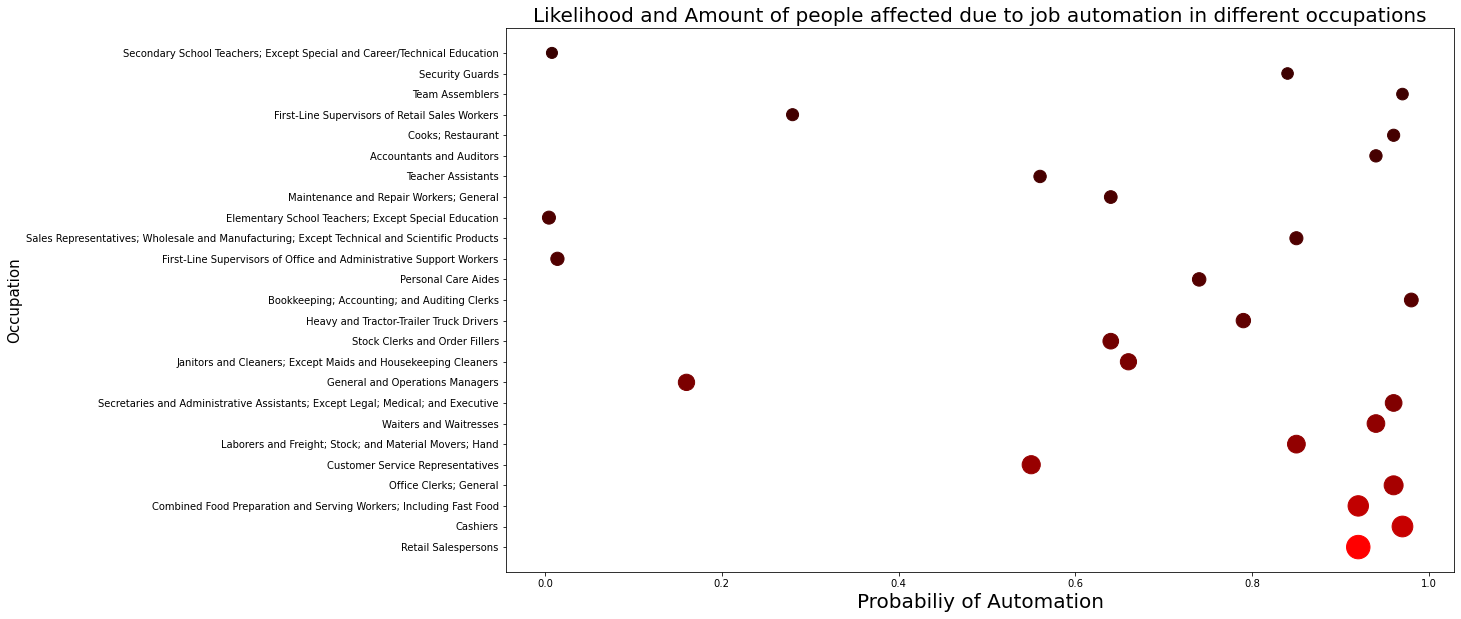

In [12]:
end_range = 25

x = occupation_sum_df['Probability'].values[:end_range]
y = np.arange(end_range)
y_label = occupation_sum_df['Occupation'].values[:end_range]

scaling = occupation_sum_df['Num of Workers'].values[:end_range]
max_num_of_workers = scaling.max()

scaling_norm = (scaling / max_num_of_workers) * 550

color1= [np.array([1,0,0]) * i for i in (scaling / max_num_of_workers)]


plt.figure(figsize=(17, 10))
plt.scatter(x,y, s=scaling_norm, c=color1)
plt.yticks(y,y_label)
plt.xlabel('Probabiliy of Automation', fontsize=20)
plt.ylabel('Occupation', fontsize=15)
plt.title('Likelihood and Amount of people affected due to job automation in different occupations', fontsize=20)

plt.savefig('../Graphs/automation_likelihood.png')

plt.show()

